<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/estadistica/Regresion_Logistica_Como_la_Funci%C3%B3n_Sigmoide_Resuelve_la_Clasificacion_Binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística: Cómo la Función Sigmoide Resuelve la Clasificación Binaria

## 1. El Problema: Cuando la Regresión Lineal se Encuentra con Resultados Binarios

Imagina que eres profesor y quieres predecir si tus estudiantes aprobarán un examen basándote en sus horas de estudio. Tienes datos históricos: algunos estudiantes estudiaron 2 horas y reprobaron, otros estudiaron 8 horas y aprobaron. Tu instinto te dice: "Usaré regresión lineal, funciona para todo".

Veamos qué sucede:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos: horas de estudio vs resultado (0=reprobó, 1=aprobó)
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
passed = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

# Ajustar regresión lineal
model = LinearRegression()
model.fit(hours, passed)

# Predecir para un rango amplio
hours_extended = np.linspace(0, 15, 100).reshape(-1, 1)
predictions = model.predict(hours_extended)

# Predicciones específicas problemáticas
print(f"Predicción para 0 horas: {model.predict([[0]])[0]:.2f}")
print(f"Predicción para 8 horas: {model.predict([[8]])[0]:.2f}")
print(f"Predicción para 12 horas: {model.predict([[12]])[0]:.2f}")

Predicción para 0 horas: -0.27
Predicción para 8 horas: 0.85
Predicción para 12 horas: 1.41


Aquí está el problema fundamental: la regresión lineal predice **-0.27** para cero horas de estudio y **1.41** para doce horas. Estos números no tienen sentido como probabilidades. Una probabilidad debe estar entre 0 y 1, siempre. No puedes tener una probabilidad negativa de aprobar, ni una probabilidad del 141%.

La regresión lineal fue diseñada para predecir valores continuos sin límites: precios de casas, temperaturas, distancias. Cuando la forzamos a predecir probabilidades, ignora las restricciones naturales del problema. La recta simplemente atraviesa los puntos y continúa hacia el infinito en ambas direcciones.

Necesitamos una función que tome cualquier número real y lo transforme en un valor entre 0 y 1, interpretable como probabilidad. Necesitamos la función sigmoide.

---

**Visualización para Sección 1:**

**Descripción de la visualización:** El gráfico muestra un scatter plot con los datos binarios (puntos azules en y=0 o y=1) y una línea recta roja que los atraviesa. Las zonas sombreadas en rojo claro destacan donde las predicciones exceden los límites válidos de probabilidad (por encima de 1 y por debajo de 0). Las líneas horizontales punteadas en y=0 y y=1 marcan los límites válidos. Las anotaciones señalan claramente las predicciones imposibles.

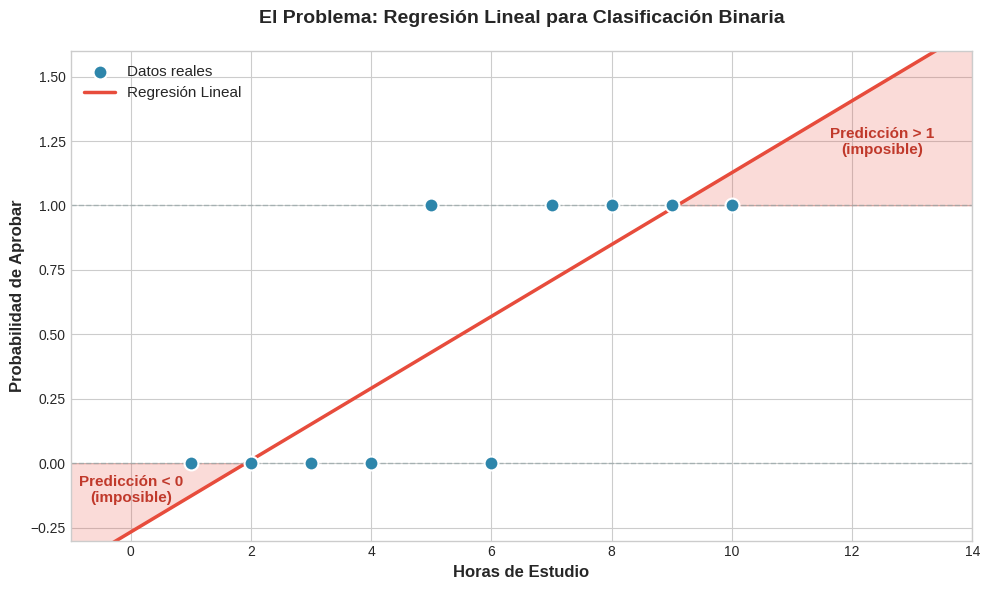

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# Configuración de estilo profesional
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Datos
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
passed = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

# Modelo
model = LinearRegression()
model.fit(hours, passed)

# Predicciones extendidas
hours_extended = np.linspace(-1, 14, 100).reshape(-1, 1)
predictions = model.predict(hours_extended)

# Graficar
ax.scatter(hours, passed, color='#2E86AB', s=100, zorder=5,
           label='Datos reales', edgecolor='white', linewidth=1.5)
ax.plot(hours_extended, predictions, color='#E74C3C', linewidth=2.5,
        label='Regresión Lineal')

# Zonas problemáticas
ax.axhline(y=0, color='#95A5A6', linestyle='--', linewidth=1, alpha=0.7)
ax.axhline(y=1, color='#95A5A6', linestyle='--', linewidth=1, alpha=0.7)
ax.fill_between(hours_extended.flatten(), 1, predictions,
                where=(predictions > 1), color='#E74C3C', alpha=0.2)
ax.fill_between(hours_extended.flatten(), predictions, 0,
                where=(predictions < 0), color='#E74C3C', alpha=0.2)

# Anotaciones
ax.annotate('Predicción > 1\n(imposible)', xy=(12.5, 1.2), fontsize=11,
            ha='center', color='#C0392B', fontweight='bold')
ax.annotate('Predicción < 0\n(imposible)', xy=(0, -0.15), fontsize=11,
            ha='center', color='#C0392B', fontweight='bold')

# Etiquetas y título
ax.set_xlabel('Horas de Estudio', fontsize=12, fontweight='bold')
ax.set_ylabel('Probabilidad de Aprobar', fontsize=12, fontweight='bold')
ax.set_title('El Problema: Regresión Lineal para Clasificación Binaria',
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=11)
ax.set_xlim(-1, 14)
ax.set_ylim(-0.3, 1.6)

plt.tight_layout()
plt.savefig('linear_regression_problem.png', dpi=150, bbox_inches='tight')
plt.show()

---

## 2. La Función Sigmoide: Comprimiendo el Infinito en Probabilidad

La función sigmoide resuelve nuestro problema con elegancia matemática. Su fórmula es:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Analicemos cada componente:

- **$z$**: cualquier número real, desde menos infinito hasta más infinito
- **$e^{-z}$**: la función exponencial invertida, siempre positiva
- **$1 + e^{-z}$**: siempre mayor que 1
- **$\frac{1}{1 + e^{-z}}$**: siempre entre 0 y 1

La magia está en cómo se comporta.
- Cuando $z$ es muy negativo (digamos -10), $e^{-z}$ se vuelve enorme, haciendo que la fracción se acerque a 0.
- Cuando $z$ es muy positivo (digamos +10), $e^{-z}$ se acerca a 0, haciendo que la fracción se acerque a 1.
- Cuando $z = 0$, obtenemos exactamente $\frac{1}{1+1} = 0.5$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Demostrar comportamiento
test_values = [-10, -5, -2, 0, 2, 5, 10]
for z in test_values:
    prob = sigmoid(z)
    print(f"z = {z:3d} → σ(z) = {prob:.6f}")

z = -10 → σ(z) = 0.000045
z =  -5 → σ(z) = 0.006693
z =  -2 → σ(z) = 0.119203
z =   0 → σ(z) = 0.500000
z =   2 → σ(z) = 0.880797
z =   5 → σ(z) = 0.993307
z =  10 → σ(z) = 0.999955


Observa el patrón:
- valores negativos grandes producen probabilidades cercanas a 0
- valores positivos grandes producen probabilidades cercanas a 1
- el punto medio es exactamente 0.5.  

La transición es suave y continua, formando la característica curva en "S" que da nombre a la función (sigmoide viene del griego "sigma", por su forma).

La curva sigmoide actúa como un compresor:
- toma el rango infinito de números reales y los "aplasta" suavemente en el intervalo (0, 1).
- Nunca toca exactamente 0 ni 1, pero se acerca asintóticamente a estos valores.

Esta propiedad es perfecta para modelar probabilidades.

---

**Visualización para Sección 2:**

**Descripción de la visualización:** Gráfico principal mostrando la curva sigmoide en forma de "S". La curva azul gruesa es el protagonista visual. Las líneas punteadas horizontales marcan las asíntotas en y=0 y y=1, y la línea en y=0.5 marca el umbral. El punto rojo destaca el punto de inflexión en (0, 0.5). Los puntos verdes muestran ejemplos concretos de valores. La fórmula LaTeX aparece en un recuadro dentro del gráfico. Un cuadro de texto lista las propiedades clave.

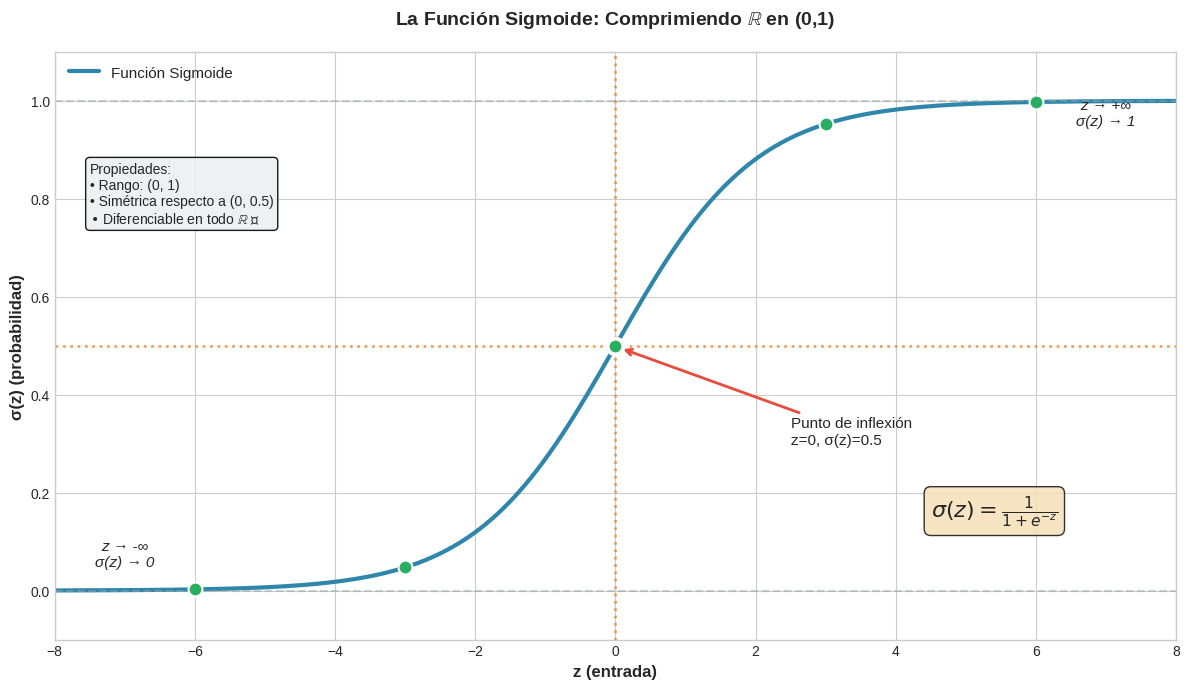

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'STIX'    # 'DejaVu Sans' 'Arial Unicode MS' 'cm' 'dejavuserif'

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Configuración
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Curva sigmoide
z = np.linspace(-8, 8, 1000)
sigma = sigmoid(z)

# Graficar curva principal
ax.plot(z, sigma, color='#2E86AB', linewidth=3, label='Función Sigmoide')

# Asíntotas y punto medio
ax.axhline(y=0, color='#95A5A6', linestyle='--', linewidth=1.5, alpha=0.5)
ax.axhline(y=1, color='#95A5A6', linestyle='--', linewidth=1.5, alpha=0.5)
ax.axhline(y=0.5, color='#E67E22', linestyle=':', linewidth=2, alpha=0.7)
ax.axvline(x=0, color='#E67E22', linestyle=':', linewidth=2, alpha=0.7)

# Punto de inflexión
ax.scatter([0], [0.5], color='#E74C3C', s=150, zorder=5,
           edgecolor='white', linewidth=2)

# Puntos de ejemplo
example_z = [-6, -3, 0, 3, 6]
example_sigma = sigmoid(np.array(example_z))
ax.scatter(example_z, example_sigma, color='#27AE60', s=100, zorder=5,
           edgecolor='white', linewidth=1.5)

# Anotaciones
ax.annotate('z → -∞\nσ(z) → 0', xy=(-7, 0.05), fontsize=11,
            ha='center', style='italic')
ax.annotate('z → +∞\nσ(z) → 1', xy=(7, 0.95), fontsize=11,
            ha='center', style='italic')
ax.annotate('Punto de inflexión\nz=0, σ(z)=0.5', xy=(0.07, 0.495),
            xytext=(2.5, 0.3), fontsize=11, ha='left',
            arrowprops=dict(arrowstyle='->', color='#E74C3C', lw=2))

# Fórmula en el gráfico
ax.text(4.5, 0.15, r'$\sigma(z) = \frac{1}{1 + e^{-z}}$',
        fontsize=16, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Etiquetas
ax.set_xlabel('z (entrada)', fontsize=12, fontweight='bold')
ax.set_ylabel('σ(z) (probabilidad)', fontsize=12, fontweight='bold')
ax.set_title('La Función Sigmoide: Comprimiendo $\mathbb{R}$ en (0,1)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(-8, 8)
ax.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left', fontsize=11)

# Agregar texto de propiedades
props_text = 'Propiedades:\n• Rango: (0, 1)\n• Simétrica respecto a (0, 0.5)\n• Diferenciable en todo $\mathbb{R}$ ℝ'
ax.text(-7.5, 0.75, props_text, fontsize=10,
        bbox=dict(boxstyle='round', facecolor='#ECF0F1', alpha=0.9))

plt.tight_layout()
plt.savefig('sigmoid_function.png', dpi=150, bbox_inches='tight')
plt.show()

---

## 3. Uniendo las Piezas: El Modelo de Regresión Logística

Ahora conectamos la regresión lineal con la función sigmoide. En regresión lineal, calculamos una combinación lineal de las características:

$$z = w^T x + b = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

Donde $w$ son los pesos (coeficientes) y $b$ es el sesgo (intercepto). Este valor $z$ puede ser cualquier número real. La regresión logística toma este $z$ y lo pasa por la función sigmoide:

$$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-(w^T x + b)}}$$

Esta fórmula nos dice: "La probabilidad de que la clase sea 1, dado el input $x$, es el resultado de aplicar la sigmoide a la combinación lineal de las características".

El flujo es simple:
1. **Entrada**: características del dato (horas de estudio, por ejemplo)
2. **Combinación lineal**: multiplicar por pesos y sumar el sesgo
3. **Transformación sigmoide**: convertir a probabilidad
4. **Salida**: probabilidad entre 0 y 1

El modelo aprende los valores óptimos de $w$ y $b$ durante el entrenamiento, ajustándolos para que las probabilidades predichas coincidan lo mejor posible con las etiquetas reales.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression

# Mismos datos que antes
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
passed = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

# Comparar ambos modelos
lin_model = LinearRegression()
log_model = LogisticRegression()

lin_model.fit(hours, passed)
log_model.fit(hours, passed)

# Predicciones
hours_test = np.array([[0], [8], [12], [15]])
lin_pred = lin_model.predict(hours_test)
log_pred = log_model.predict_proba(hours_test)[:, 1]

print("Horas | Lineal | Logística")
print("-" * 30)
for h, lp, logp in zip(hours_test.flatten(), lin_pred, log_pred):
    print(f"  {h:2d}  |  {lp:5.2f} |   {logp:.4f}")

Horas | Lineal | Logística
------------------------------
   0  |  -0.27 |   0.0068
   8  |   0.85 |   0.9059
  12  |   1.41 |   0.9972
  15  |   1.82 |   0.9998


La diferencia es clara: mientras que la regresión lineal produce valores imposibles, la regresión logística mantiene todas las predicciones dentro del rango válido de probabilidades.
- Para 0 horas, predice una probabilidad muy baja (0.68%) pero válida.
- Para 15 horas, predice una probabilidad muy alta (99.98%) pero sin exceder 1.

---

**Visualización para Sección 3:**

**Descripción de la visualización:** Dos gráficos lado a lado. El izquierdo muestra la regresión lineal con su recta roja atravesando los límites válidos, marcado con una "X" roja y texto indicando "valores inválidos". El derecho muestra la regresión logística con su curva verde en forma de S, siempre dentro de (0,1), marcado con un check verde y texto indicando "probabilidades válidas". Ambos gráficos tienen los mismos datos (puntos azules) para facilitar la comparación directa.

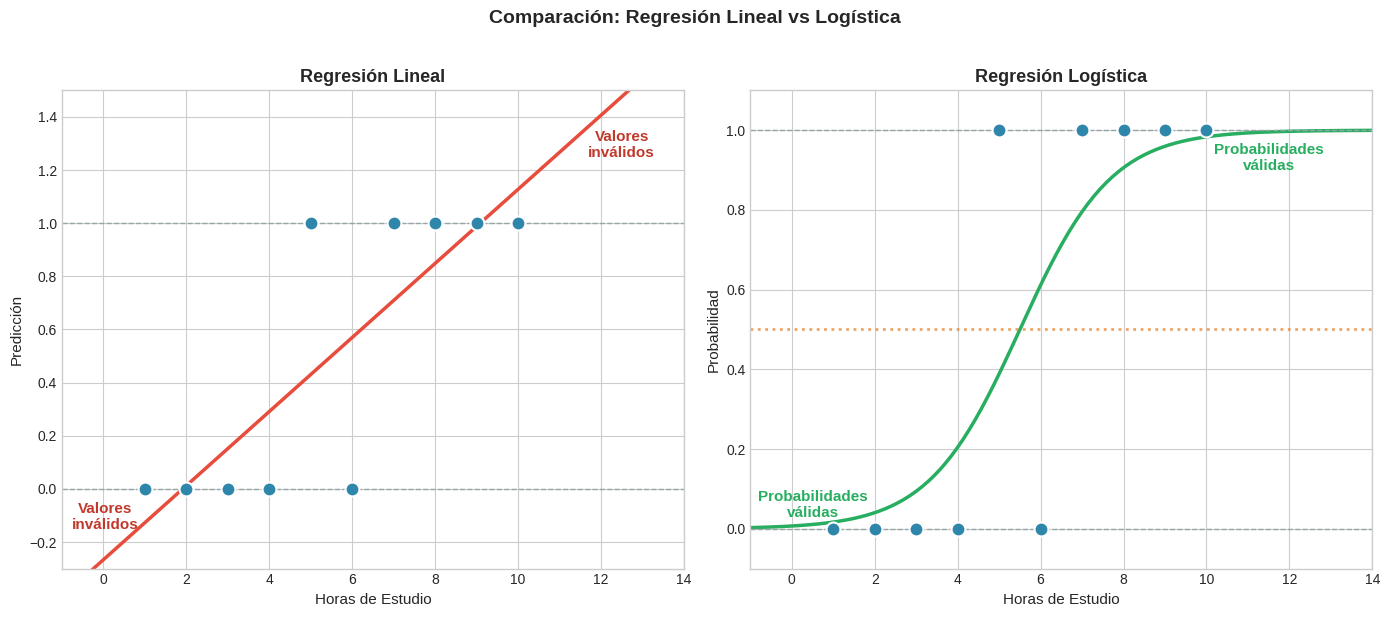

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Datos
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
passed = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

# Modelos
lin_model = LinearRegression().fit(hours, passed)
log_model = LogisticRegression().fit(hours, passed)

# Predicciones
hours_range = np.linspace(-1, 14, 200).reshape(-1, 1)
lin_pred = lin_model.predict(hours_range)
log_pred = log_model.predict_proba(hours_range)[:, 1]

# Gráfico 1: Regresión Lineal
ax1.scatter(hours, passed, color='#2E86AB', s=100, zorder=5,
            edgecolor='white', linewidth=1.5)
ax1.plot(hours_range, lin_pred, color='#E74C3C', linewidth=2.5)
ax1.axhline(y=0, color='#95A5A6', linestyle='--', linewidth=1)
ax1.axhline(y=1, color='#95A5A6', linestyle='--', linewidth=1)
ax1.set_title('Regresión Lineal', fontsize=13, fontweight='bold')
ax1.set_xlabel('Horas de Estudio', fontsize=11)
ax1.set_ylabel('Predicción', fontsize=11)
ax1.set_xlim(-1, 14)
ax1.set_ylim(-0.3, 1.5)
ax1.text(12.5, 1.25, 'Valores\ninválidos', fontsize=11, color='#C0392B',
         ha='center', fontweight='bold')
ax1.text(0.05, -0.15, 'Valores\ninválidos', fontsize=11, color='#C0392B',
         ha='center', fontweight='bold')

# Gráfico 2: Regresión Logística
ax2.scatter(hours, passed, color='#2E86AB', s=100, zorder=5,
            edgecolor='white', linewidth=1.5)
ax2.plot(hours_range, log_pred, color='#27AE60', linewidth=2.5)
ax2.axhline(y=0, color='#95A5A6', linestyle='--', linewidth=1)
ax2.axhline(y=1, color='#95A5A6', linestyle='--', linewidth=1)
ax2.axhline(y=0.5, color='#E67E22', linestyle=':', linewidth=2, alpha=0.7)
ax2.set_title('Regresión Logística', fontsize=13, fontweight='bold')
ax2.set_xlabel('Horas de Estudio', fontsize=11)
ax2.set_ylabel('Probabilidad', fontsize=11)
ax2.set_xlim(-1, 14)
ax2.set_ylim(-0.1, 1.1)
ax2.text(11.5, 0.9, 'Probabilidades\nválidas', fontsize=11, color='#27AE60',
         ha='center', fontweight='bold')
ax2.text(0.5, 0.03, 'Probabilidades\nválidas', fontsize=11, color='#27AE60',
         ha='center', fontweight='bold')

plt.suptitle('Comparación: Regresión Lineal vs Logística',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('linear_vs_logistic.png', dpi=150, bbox_inches='tight')
plt.show()

---

## 4. Tomando Decisiones: El Umbral de Clasificación

La regresión logística produce probabilidades, pero a menudo necesitamos una decisión binaria: ¿aprueba o no aprueba? Aquí entra el umbral de clasificación.

El umbral estándar es **0.5**. Si la probabilidad predicha es mayor o igual a 0.5, clasificamos como clase 1 (aprueba). Si es menor, clasificamos como clase 0 (no aprueba). Este umbral tiene una interpretación elegante conectada a la función sigmoide: cuando $z = 0$, la sigmoide produce exactamente 0.5. Esto significa que el modelo predice clase 1 cuando la combinación lineal $w^T x + b > 0$.

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression

hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
passed = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

model = LogisticRegression()
model.fit(hours, passed)

# Predicciones con umbral 0.5
test_hours = np.array([[4], [5], [6]])
probabilities = model.predict_proba(test_hours)[:, 1]
predictions = model.predict(test_hours)

print("Horas | Probabilidad | Predicción (umbral=0.5)")
print("-" * 50)
for h, prob, pred in zip(test_hours.flatten(), probabilities, predictions):
    print(f"  {h}   |    {prob:.4f}    |        {pred}")

Horas | Probabilidad | Predicción (umbral=0.5)
--------------------------------------------------
  4   |    0.2044    |        0
  5   |    0.3886    |        0
  6   |    0.6113    |        1


La elección del umbral puede ajustarse según el contexto. En diagnóstico médico, donde un falso negativo es grave, podríamos usar un umbral más bajo (0.3) para ser más conservadores. En filtrado de spam, donde los falsos positivos son molestos, podríamos usar un umbral más alto (0.7). El umbral 0.5 es neutral: trata ambos tipos de error con igual importancia.

---

**Visualización para Sección 4:**

**Descripción de la visualización:** Gráfico mostrando la curva de probabilidad (azul) con una línea horizontal roja gruesa en y=0.5 representando el umbral. Las zonas por encima del umbral están sombreadas en verde claro (clase 1), y las zonas por debajo están sombreadas en rojo claro (clase 0). Un punto rojo marca la intersección exacta donde la curva cruza el umbral, con una anotación indicando las horas correspondientes a este punto de decisión.

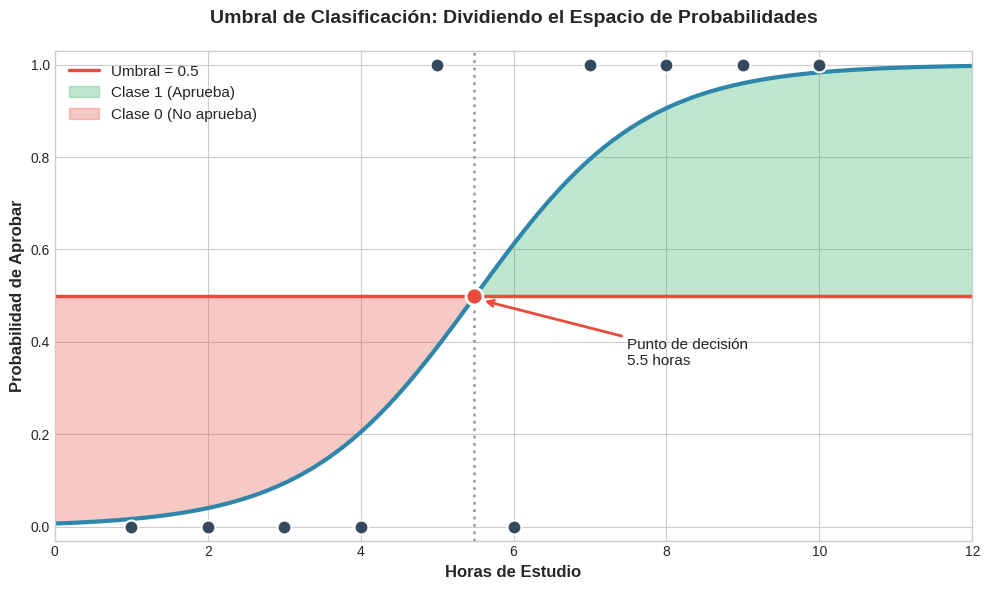

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Datos y modelo
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
passed = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])
model = LogisticRegression().fit(hours, passed)

# Curva de probabilidad
hours_range = np.linspace(0, 12, 200).reshape(-1, 1)
probs = model.predict_proba(hours_range)[:, 1]

# Graficar
ax.plot(hours_range, probs, color='#2E86AB', linewidth=3)
ax.scatter(hours, passed, color='#34495E', s=100, zorder=5,
           edgecolor='white', linewidth=1.5)

# Umbral
ax.axhline(y=0.5, color='#E74C3C', linestyle='-', linewidth=2.5,
           label='Umbral = 0.5')

# Zonas de decisión
ax.fill_between(hours_range.flatten(), 0.5, probs,
                where=(probs >= 0.5), color='#27AE60', alpha=0.3,
                label='Clase 1 (Aprueba)')
ax.fill_between(hours_range.flatten(), probs, 0.5,
                where=(probs < 0.5), color='#E74C3C', alpha=0.3,
                label='Clase 0 (No aprueba)')

# Encontrar punto de cruce
threshold_hours = hours_range[np.argmin(np.abs(probs - 0.5))][0]
ax.axvline(x=threshold_hours, color='#95A5A6', linestyle=':', linewidth=2)
ax.scatter([threshold_hours], [0.5], color='#E74C3C', s=150, zorder=6,
           edgecolor='white', linewidth=2)
ax.annotate(f'Punto de decisión\n{threshold_hours:.1f} horas',
            xy=(threshold_hours+0.1, 0.49), xytext=(threshold_hours+2, 0.35),
            fontsize=11, ha='left',
            arrowprops=dict(arrowstyle='->', color='#E74C3C', lw=2))

# Etiquetas
ax.set_xlabel('Horas de Estudio', fontsize=12, fontweight='bold')
ax.set_ylabel('Probabilidad de Aprobar', fontsize=12, fontweight='bold')
ax.set_title('Umbral de Clasificación: Dividiendo el Espacio de Probabilidades',
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=11)
ax.set_xlim(0, 12)
ax.set_ylim(-0.03, 1.03)

plt.tight_layout()
plt.savefig('classification_threshold.png', dpi=150, bbox_inches='tight')
plt.show()

---

## 5. Ejemplo Práctico: Viéndolo en Acción

Implementemos un ejemplo completo usando scikit-learn. Crearemos un dataset sintético bidimensional para visualizar el decision boundary:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Crear dataset sintético
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           flip_y=0.1, class_sep=1.5)

# Entrenar modelo
model = LogisticRegression()
model.fit(X, y)

# Métricas básicas
accuracy = model.score(X, y)
print(f"Precisión del modelo: {accuracy:.2%}")
print(f"\nCoeficientes (pesos): {model.coef_[0]}")
print(f"Intercepto (sesgo): {model.intercept_[0]:.4f}")

# Predicciones de ejemplo
sample_points = np.array([[0, 0], [2, 2], [-2, -1]])
for point in sample_points:
    prob = model.predict_proba([point])[0, 1]
    pred = model.predict([point])[0]
    print(f"\nPunto {point}:")
    print(f"  Probabilidad clase 1: {prob:.4f}")
    print(f"  Predicción: Clase {pred}")

Precisión del modelo: 88.00%

Coeficientes (pesos): [ 1.23010334 -1.01087679]
Intercepto (sesgo): 1.5258

Punto [0 0]:
  Probabilidad clase 1: 0.8214
  Predicción: Clase 1

Punto [2 2]:
  Probabilidad clase 1: 0.8770
  Predicción: Clase 1

Punto [-2 -1]:
  Probabilidad clase 1: 0.5191
  Predicción: Clase 1


El modelo ha aprendido los pesos óptimos que separan las dos clases. La frontera de decisión es donde $w_1 x_1 + w_2 x_2 + b = 0$, que forma una línea recta en el espacio bidimensional.

---

**Visualización para Sección 5:**

**Descripción de la visualización:** Gráfico bidimensional mostrando el decision boundary. El fondo es un gradiente de colores (rojo a azul) representando la probabilidad predicha en cada punto del espacio. Los puntos de datos están coloreados según su clase real. Una línea negra gruesa marca el decision boundary donde la probabilidad es exactamente 0.5. Una barra de colores a la derecha indica la escala de probabilidades. Las zonas rojas tienen alta probabilidad de ser clase 0, las azules clase 1.

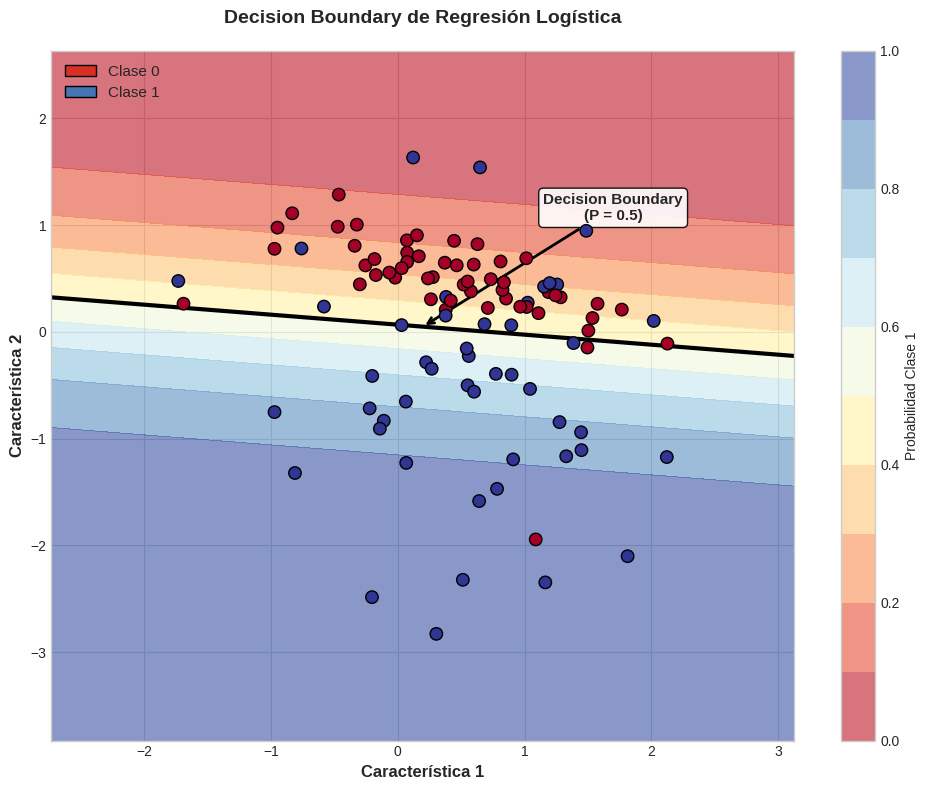

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))

# Dataset
np.random.seed(44)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           flip_y=0.08, class_sep=0.5)

# Modelo
model = LogisticRegression()
model.fit(X, y)

# Crear meshgrid para decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Probabilidades en todo el espacio
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Graficar contorno de probabilidad
contour = ax.contourf(xx, yy, Z, levels=np.linspace(0, 1, 11),
                      cmap='RdYlBu', alpha=0.6)
plt.colorbar(contour, ax=ax, label='Probabilidad Clase 1')

# Decision boundary (probabilidad = 0.5)
ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=3)

# Datos
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu',
                    edgecolor='black', linewidth=1, s=80, zorder=5)

# Anotación del decision boundary
mid_x = (x_min + x_max) / 2
mid_y = -(model.coef_[0, 0] * mid_x + model.intercept_[0]) / model.coef_[0, 1]
ax.annotate('Decision Boundary\n(P = 0.5)', xy=(mid_x, mid_y),
            xytext=(mid_x + 1.5, mid_y + 1), fontsize=11,
            fontweight='bold', ha='center',
            arrowprops=dict(arrowstyle='->', color='black', lw=2),
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Etiquetas
ax.set_xlabel('Característica 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Característica 2', fontsize=12, fontweight='bold')
ax.set_title('Decision Boundary de Regresión Logística',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Leyenda manual
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#d73027', edgecolor='black', label='Clase 0'),
                   Patch(facecolor='#4575b4', edgecolor='black', label='Clase 1')]
ax.legend(handles=legend_elements, loc='upper left', fontsize=11)

plt.tight_layout()
plt.savefig('decision_boundary.png', dpi=150, bbox_inches='tight')
plt.show()

---

## 6. Conclusiones

La regresión logística resuelve un problema fundamental: cómo predecir probabilidades válidas para clasificación binaria. La función sigmoide es la pieza central que transforma cualquier valor real en una probabilidad entre 0 y 1.

Recuerda estos conceptos principales:

La regresión lineal falla para clasificación binaria porque produce valores fuera del rango válido de probabilidades. La función sigmoide $\sigma(z) = \frac{1}{1 + e^{-z}}$ comprime el rango infinito de números reales en el intervalo (0, 1), creando probabilidades válidas. El modelo completo combina una función lineal con la transformación sigmoide, permitiendo aprender fronteras de decisión óptimas. El umbral de clasificación (típicamente 0.5) convierte probabilidades continuas en decisiones discretas.

La elegancia de esta solución radica en su simplicidad matemática y su interpretabilidad. Los coeficientes aprendidos tienen significado directo: indican cómo cada característica influye en la probabilidad de pertenecer a una clase.

En futuros artículos exploraremos cómo el modelo aprende sus parámetros mediante gradient descent, la función de costo log-loss que optimiza, y técnicas de regularización para prevenir overfitting. Estos conceptos construyen sobre la base sólida que hemos establecido aquí.

---

**Etiquetas sugeridas:**
```bash
#LogisticRegression #MachineLearning #DataScience #Python #Classification #Sigmoid #Sklearn #BinaryClassification
```